In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [76]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
weather_api_key = "09d8acc7b16ab519e916669958d4ecf7"
appid = weather_api_key
settings = {"units": "imperial", "appid": weather_api_key}
url = f"{base_url}appid={weather_api_key}&units={units}"


In [79]:
url

'http://api.openweathermap.org/data/2.5/weather?appid=09d8acc7b16ab519e916669958d4ecf7&units=imperial'

In [85]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | rincon
Processing Record 4 of Set 1 | doha
Processing Record 5 of Set 1 | romny
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | jidong
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | oistins
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | mosetse
Processing Record 16 of Set 1 | wielun
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | erechim
Processing Record 24 of Set

Processing Record 37 of Set 4 | flinders
Processing Record 38 of Set 4 | rocha
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 41 of Set 4 | tra vinh
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 44 of Set 4 | nara
Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | meiganga
Processing Record 47 of Set 4 | constitucion
Processing Record 48 of Set 4 | port keats
Processing Record 49 of Set 4 | sembe
Processing Record 0 of Set 5 | san patricio
Processing Record 1 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | santa rosa
Processing Record 4 of Set 5 | bend
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | waterloo
Processing Record 7 of Set 5 | shizunai
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Se

Processing Record 28 of Set 8 | dubbo
Processing Record 29 of Set 8 | hirado
Processing Record 30 of Set 8 | saint-georges
Processing Record 31 of Set 8 | strezhevoy
Processing Record 32 of Set 8 | ananindeua
Processing Record 33 of Set 8 | goderich
Processing Record 34 of Set 8 | onufriyivka
Processing Record 35 of Set 8 | sola
Processing Record 36 of Set 8 | rumphi
Processing Record 37 of Set 8 | inhambane
Processing Record 38 of Set 8 | sitka
Processing Record 39 of Set 8 | gulshat
City not found. Skipping...
Processing Record 40 of Set 8 | san isidro
Processing Record 41 of Set 8 | marcona
City not found. Skipping...
Processing Record 42 of Set 8 | san quintin
Processing Record 43 of Set 8 | souillac
Processing Record 44 of Set 8 | avera
Processing Record 45 of Set 8 | sao filipe
Processing Record 46 of Set 8 | southbridge
Processing Record 47 of Set 8 | riyadh
Processing Record 48 of Set 8 | guna
Processing Record 49 of Set 8 | selty
Processing Record 0 of Set 9 | dalbandin
Proces

Processing Record 16 of Set 12 | mazamet
Processing Record 17 of Set 12 | orel-izumrud
Processing Record 18 of Set 12 | utiroa
City not found. Skipping...
Processing Record 19 of Set 12 | ampanihy
Processing Record 20 of Set 12 | itaueira
Processing Record 21 of Set 12 | sorland
Processing Record 22 of Set 12 | williams lake
Processing Record 23 of Set 12 | maldonado
Processing Record 24 of Set 12 | tual
Processing Record 25 of Set 12 | muros
Processing Record 26 of Set 12 | semirom
Processing Record 27 of Set 12 | mpophomeni
Processing Record 28 of Set 12 | abu samrah
Processing Record 29 of Set 12 | yar-sale
Processing Record 30 of Set 12 | makinsk
Processing Record 31 of Set 12 | klin
Processing Record 32 of Set 12 | sao joao do piaui
Processing Record 33 of Set 12 | isangel
Processing Record 34 of Set 12 | usinsk
Processing Record 35 of Set 12 | meulaboh
Processing Record 36 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 12 | falmouth
Pro

In [87]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [88]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,41.11,56,40,12.66,CL,1670381022
1,hasaki,35.7333,140.8333,55.29,41,36,6.71,JP,1670381214
2,rincon,32.2960,-81.2354,66.16,95,28,4.09,US,1670380625
3,doha,25.2867,51.5333,76.89,78,0,8.05,QA,1670380769
4,romny,50.7510,33.4747,21.88,52,70,13.87,UA,1670380769


In [89]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/Jackson/Downloads/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [90]:
# Read saved data
city_data_df = pd.read_csv("/Users/Jackson/Downloads/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,41.11,56,40,12.66,CL,1670381022
1,hasaki,35.7333,140.8333,55.29,41,36,6.71,JP,1670381214
2,rincon,32.2960,-81.2354,66.16,95,28,4.09,US,1670380625
3,doha,25.2867,51.5333,76.89,78,0,8.05,QA,1670380769
4,romny,50.7510,33.4747,21.88,52,70,13.87,UA,1670380769


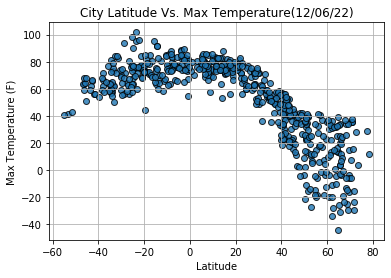

In [102]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

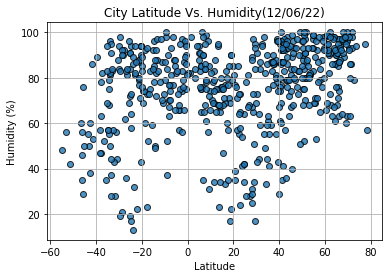

In [104]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

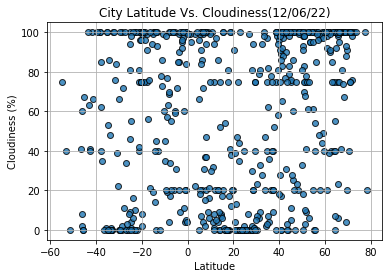

In [106]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

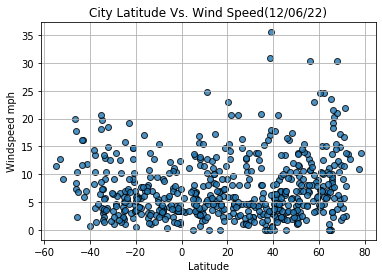

In [107]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [108]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [109]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hasaki,35.7333,140.8333,55.29,41,36,6.71,JP,1670381214
2,rincon,32.2960,-81.2354,66.16,95,28,4.09,US,1670380625
3,doha,25.2867,51.5333,76.89,78,0,8.05,QA,1670380769
4,romny,50.7510,33.4747,21.88,52,70,13.87,UA,1670380769
7,jidong,45.2167,131.0833,19.80,67,11,13.40,CN,1670381216


In [110]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,41.11,56,40,12.66,CL,1670381022
5,kaitangata,-46.2817,169.8464,59.25,56,2,17.85,NZ,1670381215
6,castro,-24.7911,-50.0119,63.66,94,4,1.07,BR,1670381216
11,rikitea,-23.1203,-134.9692,75.42,81,10,19.15,PF,1670381217
12,faanui,-16.4833,-151.7500,80.24,75,21,17.02,PF,1670381218


The r-squared is: -0.8593967581246543


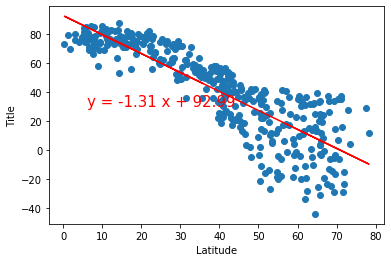

In [111]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))


The r-squared is: 0.5168446340023525


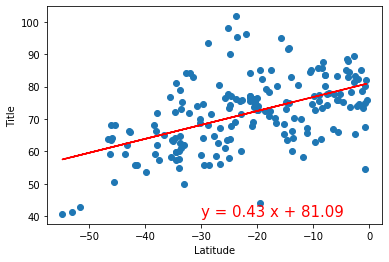

In [112]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

The r-squared is: 0.31921015200787034


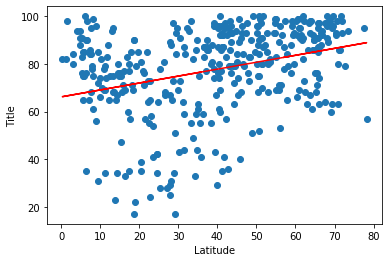

In [120]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.36562098736268867


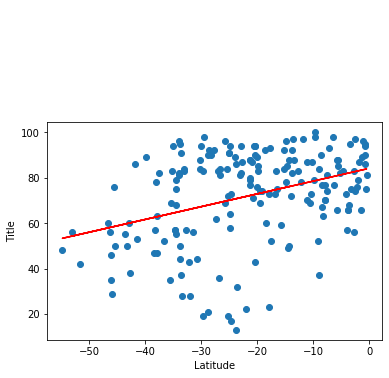

In [121]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

The r-squared is: 0.3623516641039203


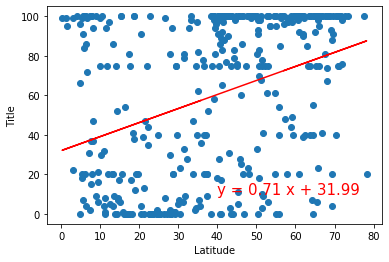

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.23608641961040555


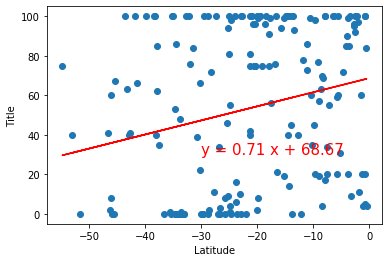

In [116]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

The r-squared is: 0.16245117328656886


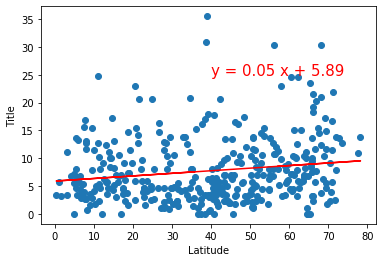

In [124]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.30808872819075983


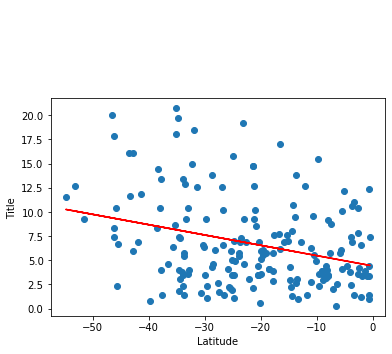

In [125]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))